In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import imageio
import glob
import os
import time
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow import keras
from keras import backend as K
from scipy import ndimage
import scipy.integrate as integrate



In [3]:

datagen = ImageDataGenerator(rescale=1./255)
extract_path = r"P:\Ahmed\Datasets\MURA-v1.1\train"
# Define the parameters for image loading and preprocessing
img_height, img_width = 160,160
ImageNum = 36812
# Create a data generator for training


train_generator = datagen.flow_from_directory(
    extract_path,
    target_size=(img_height, img_width),
    class_mode='categorical',
    shuffle=True,
    batch_size = 1000
    )

Found 36812 images belonging to 7 classes.


In [5]:
x,y = train_generator.next()
print(x.shape)
print(y)
y = np.argmax(y, axis=1)
print(y) 
                                                                                            

(1000, 160, 160, 3)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[4 1 0 6 5 3 3 6 6 0 5 3 3 5 1 6 6 3 3 0 6 5 5 6 6 5 0 3 6 5 4 0 2 4 5 1 6
 2 6 5 6 0 1 5 0 0 0 0 5 5 1 5 5 6 3 0 6 0 3 5 5 0 6 5 1 1 5 5 3 2 0 6 5 1
 6 0 6 6 5 0 1 5 5 0 6 6 5 1 6 1 6 6 5 5 0 5 0 5 5 6 6 5 5 6 5 6 5 4 6 5 6
 6 1 1 3 3 5 0 1 5 3 6 6 5 0 3 6 5 4 1 5 5 3 6 3 1 5 6 6 3 1 4 0 1 6 0 0 2
 5 5 3 3 0 5 3 6 6 5 6 3 3 6 6 6 0 1 5 3 6 5 3 6 5 0 5 6 6 6 4 2 5 5 5 1 6
 6 6 4 0 6 5 3 2 3 0 6 1 5 3 5 2 6 4 6 1 5 5 3 1 3 1 6 5 3 6 2 4 3 3 3 0 0
 6 5 4 6 3 3 6 5 6 6 6 0 4 5 3 3 0 2 4 3 0 4 2 0 0 6 1 6 3 6 6 5 3 3 3 3 5
 1 3 6 5 5 4 0 6 6 3 5 1 5 0 3 1 3 0 6 5 6 6 1 5 5 5 5 4 5 5 2 3 3 3 1 5 3
 0 1 6 2 5 6 1 5 6 6 4 3 1 5 1 1 0 6 5 0 3 6 1 6 5 1 0 5 0 1 6 1 5 5 6 1 3
 1 5 6 5 3 5 3 3 1 6 5 6 5 6 3 6 3 0 1 5 5 6 6 5 0 3 3 0 5 6 6 0 1 0 1 5 6
 5 5 0 5 6 1 3 5 2 1 3 0 3 3 6 3 3 6 5 1 5 1 3 6 0 1 5 6 3 5 0 5 3 5 3 2 2

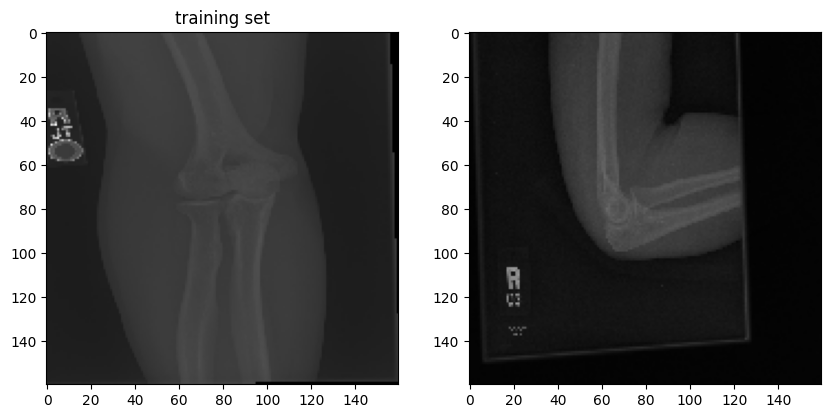

In [7]:
from PIL import Image

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.title('training set')
plt.imshow(x[55])
plt.subplot(122)
plt.imshow(x[44])


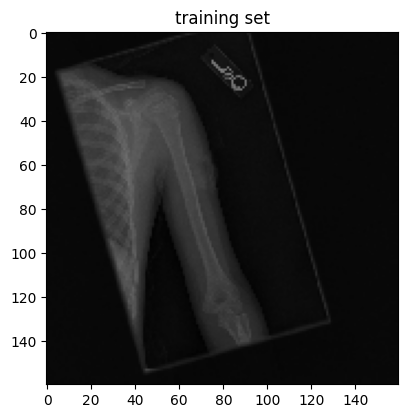

In [8]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.title('training set')
plt.imshow(x[0])

Text(0.5, 1.0, 'Equalized L Channel')

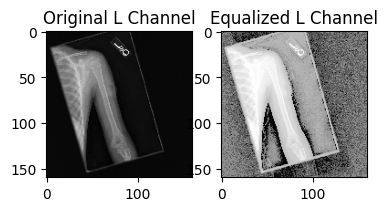

In [15]:
image = cv2.cvtColor(x[0], cv2.COLOR_RGB2Lab)
l, a, b = cv2.split(image)

# Convert to uint8 and normalize to [0, 255]
l = np.uint8((l / np.max(l)) * 255)

# Apply histogram equalization to the L channel
l_equalized = cv2.equalizeHist(l)

# Display the results
plt.subplot(1, 3, 1)
plt.imshow(l, cmap='gray')
plt.title('Original L Channel')

plt.subplot(1, 3, 2)
plt.imshow(l_equalized, cmap='gray')
plt.title('Equalized L Channel')

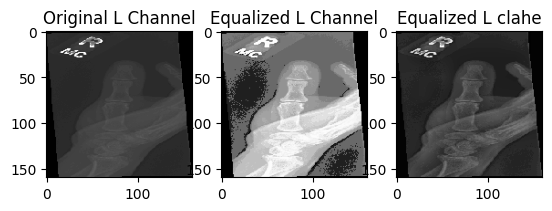

(160, 160)


In [16]:
claheImages = []
for i in range(len(x)):
    image = cv2.cvtColor(x[i], cv2.COLOR_RGB2Lab)
    l, a, b = cv2.split(image)

    # Apply histogram equalization to the L channel
    l = np.uint8(l)
    l_equalized = cv2.equalizeHist(l)



    l_clahe = cv2.createCLAHE(clipLimit= 4.0, tileGridSize=(8,8))
    claheImage = l_clahe.apply(l)
    claheImages.append(claheImage)



# Display the results
plt.subplot(1, 3, 1)
plt.imshow(l, cmap='gray')
plt.title('Original L Channel')

plt.subplot(1, 3, 2)
plt.imshow(l_equalized, cmap='gray')
plt.title('Equalized L Channel')

plt.subplot(1, 3, 3)
plt.imshow(claheImage, cmap='gray')
plt.title('Equalized L clahe')

plt.show()
print(l.shape)

Text(0.5, 1.0, 'Equalized L Channel')

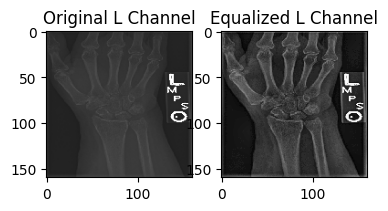

In [17]:
plt.subplot(1, 3, 1)
plt.imshow(x[99], cmap='gray')
plt.title('Original L Channel')

plt.subplot(1, 3, 2)
plt.imshow(claheImages[99], cmap='gray')
plt.title('Equalized L Channel')

SAVE

In [24]:
# Paths to the original train and valid directories
train_path = r"P:\Ahmed\Datasets\MURA-v1.1\train"
valid_path = r"P:\Ahmed\Datasets\MURA-v1.1\valid"

# Paths to the new directories for saving processed images
processed_train_path = r"P:\Ahmed\GraduationProject\GradProject\Dataset\ProcessedMURA\Train"
processed_valid_path = r"P:\Ahmed\GraduationProject\GradProject\Dataset\ProcessedMURA\Valid"


In [25]:
def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2Lab)
    l, a, b = cv2.split(lab)

    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)

    # Merge the CLAHE-processed L channel back to Lab color space
    lab_clahe = cv2.merge([l_clahe, a, b])
    clahe_image = cv2.cvtColor(lab_clahe, cv2.COLOR_Lab2RGB)

    return clahe_image

In [36]:
def process_and_save_images(input_path, output_path):
    class_folders = os.listdir(input_path)

    for class_folder in class_folders:
        class_input_path = os.path.join(input_path, class_folder)
        class_output_path = os.path.join(output_path, class_folder)

        # Create class-specific output folder
        os.makedirs(class_output_path, exist_ok=True)

        # Iterate through patient folders
        for patient_folder in os.listdir(class_input_path):
            patient_input_path = os.path.join(class_input_path, patient_folder)

            # Skip non-directory entries
            if not os.path.isdir(patient_input_path):
                continue

            patient_output_path = os.path.join(class_output_path, patient_folder)
            os.makedirs(patient_output_path, exist_ok=True)

            # Iterate through study subdirectories
            for study_folder in os.listdir(patient_input_path):
                study_input_path = os.path.join(patient_input_path, study_folder)

                # Skip non-directory entries
                if not os.path.isdir(study_input_path):
                    continue

                study_output_path = os.path.join(patient_output_path, study_folder)
                os.makedirs(study_output_path, exist_ok=True)

                image_files = os.listdir(study_input_path)

                for image_file in image_files:
                    image_path = os.path.join(study_input_path, image_file)

                    # Add print statement to check the image path
                    print(f"Processing image: {image_path}")

                    # Try loading the image
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

                    # Check if the image is loaded successfully
                    if image is None:
                        print(f"Failed to load image: {image_path}")
                        continue

                    # Add print statement to check the image shape
                    print(f"Image shape: {image.shape}")

                    # Convert BGR to RGB
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                    # Apply CLAHE
                    clahe_image = apply_clahe(image)

                    # Save the processed image
                    output_image_path = os.path.join(study_output_path, image_file)
                    cv2.imwrite(output_image_path, cv2.cvtColor(clahe_image, cv2.COLOR_RGB2BGR))

In [37]:
process_and_save_images(train_path, processed_train_path)

process_and_save_images(valid_path, processed_valid_path)


Processing image: P:\Ahmed\Datasets\MURA-v1.1\train\XR_ELBOW\patient00011\study1_negative\image1.png
Image shape: (456, 512, 3)
Processing image: P:\Ahmed\Datasets\MURA-v1.1\train\XR_ELBOW\patient00011\study1_negative\image2.png
Image shape: (512, 319, 3)
Processing image: P:\Ahmed\Datasets\MURA-v1.1\train\XR_ELBOW\patient00011\study1_negative\image3.png
Image shape: (512, 357, 3)
Processing image: P:\Ahmed\Datasets\MURA-v1.1\train\XR_ELBOW\patient00016\study1_positive\image1.png
Image shape: (512, 396, 3)
Processing image: P:\Ahmed\Datasets\MURA-v1.1\train\XR_ELBOW\patient00016\study1_positive\image2.png
Image shape: (512, 438, 3)
Processing image: P:\Ahmed\Datasets\MURA-v1.1\train\XR_ELBOW\patient00016\study1_positive\image3.png
Image shape: (512, 359, 3)
Processing image: P:\Ahmed\Datasets\MURA-v1.1\train\XR_ELBOW\patient00026\study1_negative\image1.png
Image shape: (512, 441, 3)
Processing image: P:\Ahmed\Datasets\MURA-v1.1\train\XR_ELBOW\patient00026\study1_negative\image2.png
Ima

In [38]:
lera_dataset_path = r"P:\Ahmed\GraduationProject\GradProject\Dataset\LERADataset"
processed_lera_path = r"P:\Ahmed\GraduationProject\GradProject\Dataset\ProcessedLERA"

In [39]:
process_and_save_images(lera_dataset_path, processed_lera_path)

Processing image: P:\Ahmed\GraduationProject\GradProject\Dataset\LERADataset\ANKLE\1002\ST-1\0.png
Image shape: (1350, 538, 3)
Processing image: P:\Ahmed\GraduationProject\GradProject\Dataset\LERADataset\ANKLE\1002\ST-1\1.png
Image shape: (1350, 538, 3)
Processing image: P:\Ahmed\GraduationProject\GradProject\Dataset\LERADataset\ANKLE\1002\ST-1\2.png
Image shape: (1323, 1567, 3)
Processing image: P:\Ahmed\GraduationProject\GradProject\Dataset\LERADataset\ANKLE\1002\ST-1\3.png
Image shape: (1349, 541, 3)
Processing image: P:\Ahmed\GraduationProject\GradProject\Dataset\LERADataset\ANKLE\1002\ST-1\4.png
Image shape: (1323, 1567, 3)
Processing image: P:\Ahmed\GraduationProject\GradProject\Dataset\LERADataset\ANKLE\1002\ST-1\5.png
Image shape: (1349, 541, 3)
Processing image: P:\Ahmed\GraduationProject\GradProject\Dataset\LERADataset\ANKLE\1003\ST-1\0.png
Image shape: (2920, 2320, 3)
Processing image: P:\Ahmed\GraduationProject\GradProject\Dataset\LERADataset\ANKLE\1003\ST-1\1.png
Image sha

NotADirectoryError: [WinError 267] The directory name is invalid: 'P:\\Ahmed\\GraduationProject\\GradProject\\Dataset\\LERADataset\\labels.csv'

Found 534 images belonging to 44 classes.


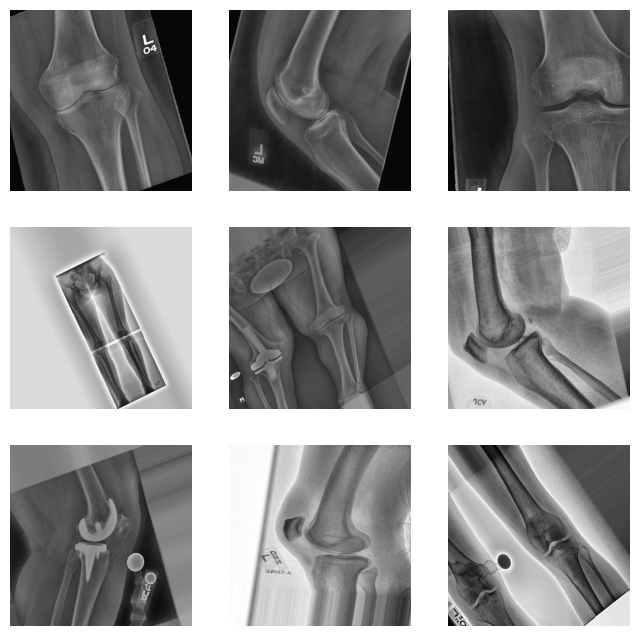

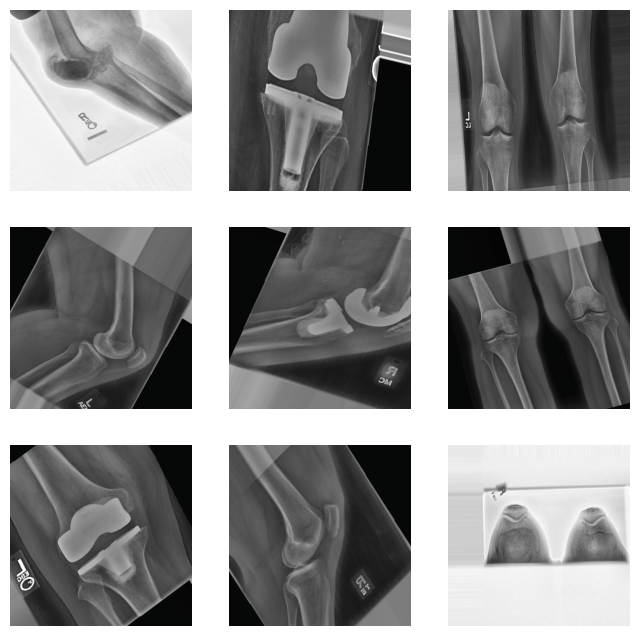

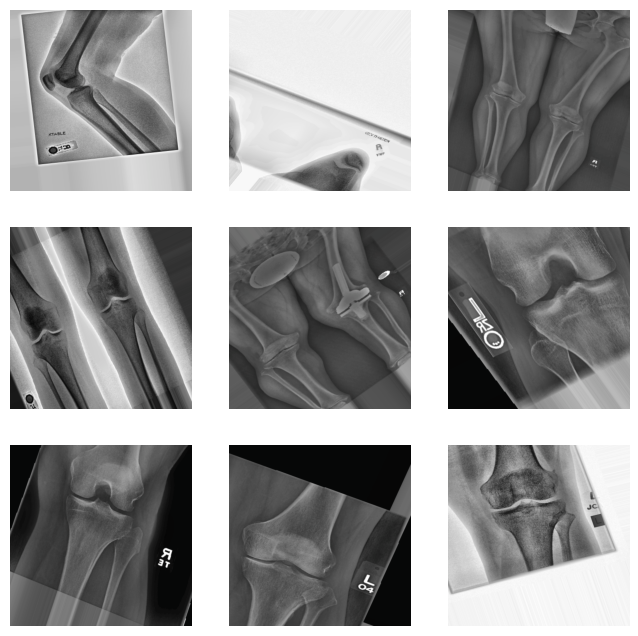

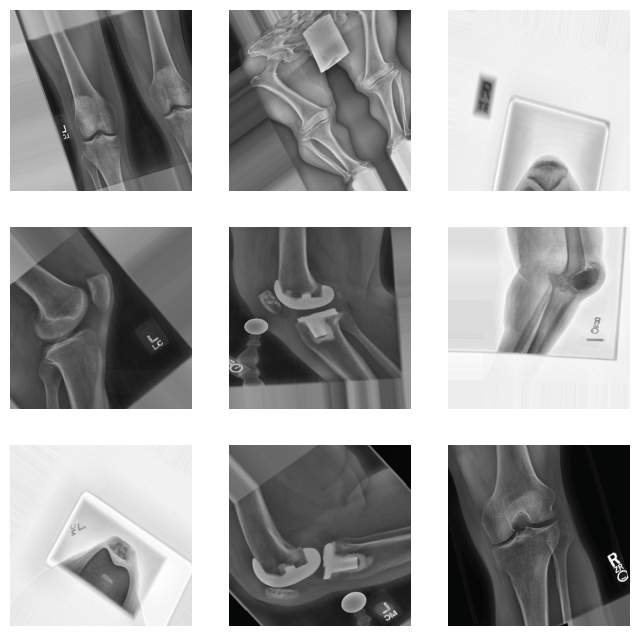

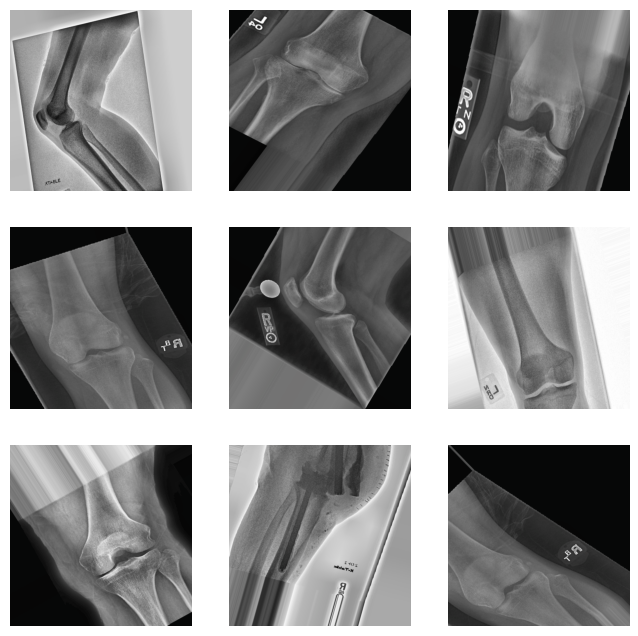

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    'P:\Ahmed\Datasets\ProcessedLERA\KNEE',
    target_size=(400, 400),
    batch_size=32,
    class_mode='binary'
)

for i in range(5):
    augmented_image, _ = train_generator.next()
    plt.figure(figsize=(8, 8))
    for j in range(9):
        plt.subplot(3, 3, j + 1)
        plt.imshow(augmented_image[j].astype('uint8'))
        plt.axis('off')
    plt.show()

In [7]:
import os

# Create a directory to save augmented images
save_directory = r'P:\Ahmed\Datasets\ProcessedLERA\KNEE\temp'
os.makedirs(save_directory, exist_ok=True)

# Generate and save augmented images
for i in range(5):
    augmented_images, _ = train_generator.next()
    for j, image in enumerate(augmented_images):
        filename = f'augmented_image_{i * 32 + j}.png'
        filepath = os.path.join(save_directory, filename)
        plt.imsave(filepath, image.astype('uint8'))